## Problem statement :
The US Family Budget Dataset provides insights into the cost of living in different US counties based on the Family Budget Calculator by the Economic Policy Institute (EPI).This dataset offers community-specific estimates for ten family types, including one or two adults with zero to four children, in all 1877 counties and metro areas across the United States.

In [84]:
import warnings
warnings.filterwarnings('ignore')

In [169]:
# libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [115]:
# read the dataset
df=pd.read_csv("C:\\Users\\pavan\\Downloads\\cost_of_living_usa.csv")
df

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,1,AL,True,"Montgomery, AL MSA",Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406
1,1,AL,True,"Montgomery, AL MSA",Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406
2,1,AL,True,"Montgomery, AL MSA",Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406
3,1,AL,True,"Montgomery, AL MSA",Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406
4,1,AL,True,"Montgomery, AL MSA",Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,3171,WY,False,"Weston County, WY",Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625
31426,3171,WY,False,"Weston County, WY",Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625
31427,3171,WY,False,"Weston County, WY",Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625
31428,3171,WY,False,"Weston County, WY",Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625


## Feature Engineering 

In [116]:
df.describe()

,case_id,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
count,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31430.000000,31420.000000
mean,1589.311804,11073.673539,8287.504557,13593.856381,13394.031748,7015.318377,9879.584233,7657.714782,70901.683601,68315.997018
std,917.218414,4165.606147,3271.140249,1640.456562,5204.545710,2397.415490,6778.223399,3339.795571,21846.545235,16886.970246
min,1.000000,4209.311280,2220.276840,2216.461440,3476.379960,2611.642080,0.000000,1027.800756,30087.662400,25529.976560
25%,792.000000,8580.000000,5801.424360,12535.159800,9667.440000,5286.354120,5341.621590,5597.970360,53776.019400,57223.988280
50%,1593.000000,10416.000000,8129.156280,13698.164400,13082.700000,6733.056120,10166.340120,6898.468860,70977.682800,65955.605470
75%,2386.000000,12444.000000,10703.624280,14765.758500,16657.816800,8413.090230,14276.377800,8790.207270,85371.341100,76136.070310
max,3171.000000,61735.587600,31178.619600,19816.482000,37252.274400,28829.443200,48831.085200,47753.390400,223717.548000,177662.468800


In [117]:
df.shape

(31430, 15)

In [118]:
df.dtypes

case_id                     int64
state                      object
isMetro                      bool
areaname                   object
county                     object
family_member_count        object
housing_cost              float64
food_cost                 float64
transportation_cost       float64
healthcare_cost           float64
other_necessities_cost    float64
childcare_cost            float64
taxes                     float64
total_cost                float64
median_family_income      float64
dtype: object

In [119]:
df.isnull().sum()

case_id                    0
state                      0
isMetro                    0
areaname                   0
county                     0
family_member_count        0
housing_cost               0
food_cost                  0
transportation_cost        0
healthcare_cost            0
other_necessities_cost     0
childcare_cost             0
taxes                      0
total_cost                 0
median_family_income      10
dtype: int64

## Observation : median_family_income has 10 missing values.

In [120]:
df[df['median_family_income'].isnull()]


,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
15110,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p0c,8052.0,3019.16160,11086.4934,6505.34988,4011.51852,0.00000,6075.80856,38750.3316,NaN
15111,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p1c,11256.0,4449.51084,11722.2708,9930.74856,5690.72604,7555.66332,7196.82420,57801.7440,NaN
15112,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p2c,11256.0,6519.27612,12405.8652,13356.14640,6440.68356,14323.03800,8732.72244,73033.7340,NaN
15113,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p3c,14688.0,8697.00216,12854.8620,16781.54400,8473.30884,16405.30800,11755.84356,89655.8676,NaN
15114,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,1p4c,14688.0,10645.71900,13619.9388,20206.94280,9179.40600,16405.30800,12372.99120,97118.3088,NaN
15115,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p0c,8772.0,5535.13032,12918.5988,13010.70000,5184.03768,0.00000,7023.17208,52443.6384,NaN
15116,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p1c,11256.0,6889.02612,13557.9828,16436.09760,6574.65816,7555.66332,8939.94504,71209.3716,NaN
15117,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p2c,11256.0,8724.80352,13977.7980,19861.49760,7239.83280,14323.03800,9841.96872,85224.9372,NaN
15118,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p3c,14688.0,10652.32248,14798.7552,23286.89520,9181.79808,16405.30800,11854.97676,100868.0508,NaN
15119,1533,MO,True,"St. Louis, MO-IL HUD Metro FMR Area",Sullivan part,2p4c,14688.0,13035.88920,14802.7416,26712.29280,10045.45896,16405.30800,12050.91480,107740.6056,NaN


here for the median family income around 10 rows have missing values.

In [121]:
df.corr()

,case_id,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
case_id,1.000000,-0.004414,-0.026491,-0.012465,0.040213,0.041542,-0.022840,0.036054,-0.067015,0.004434,0.060353
isMetro,-0.004414,1.000000,0.367349,0.048483,-0.101242,-0.078326,0.255245,0.220274,0.324290,0.196972,0.422359
housing_cost,-0.026491,0.367349,1.000000,0.577021,0.253291,0.299124,0.914854,0.644778,0.766607,0.784998,0.584800
food_cost,-0.012465,0.048483,0.577021,1.000000,0.698019,0.814550,0.857673,0.713018,0.474955,0.894176,0.125054
transportation_cost,0.040213,-0.101242,0.253291,0.698019,1.000000,0.689419,0.504562,0.455550,0.299172,0.634592,0.077726
healthcare_cost,0.041542,-0.078326,0.299124,0.814550,0.689419,1.000000,0.591030,0.526584,0.335627,0.748550,-0.070990
other_necessities_cost,-0.022840,0.255245,0.914854,0.857673,0.504562,0.591030,1.000000,0.758449,0.717454,0.936292,0.430015
childcare_cost,0.036054,0.220274,0.644778,0.713018,0.455550,0.526584,0.758449,1.000000,0.638053,0.880401,0.286404
taxes,-0.067015,0.324290,0.766607,0.474955,0.299172,0.335627,0.717454,0.638053,1.000000,0.749285,0.535975
total_cost,0.004434,0.196972,0.784998,0.894176,0.634592,0.748550,0.936292,0.880401,0.749285,1.000000,0.337168


<AxesSubplot:>

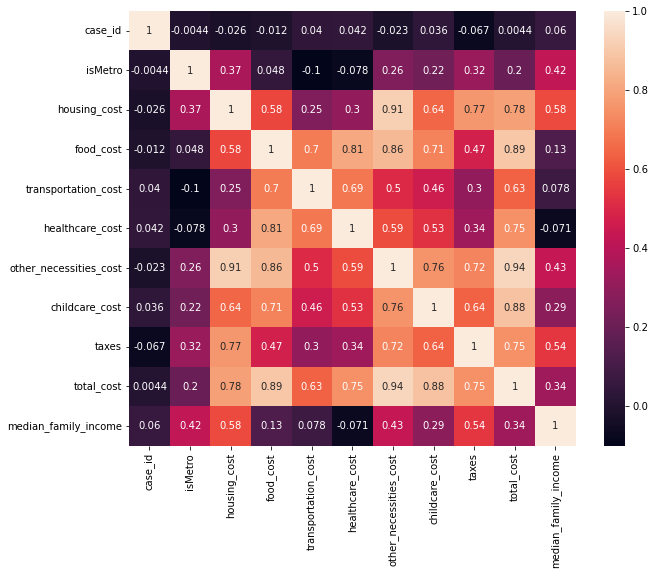

In [122]:
# plotting heatmap to check the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='median_family_income'>

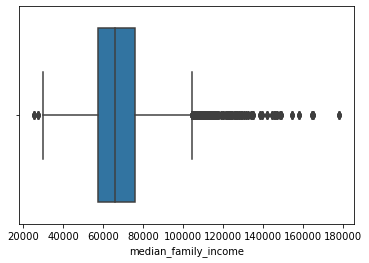

In [123]:
# visualizations
sns.boxplot(x=df["median_family_income"])

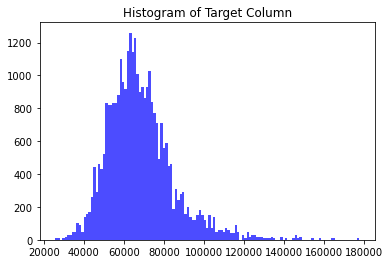

In [124]:
plt.hist(df['median_family_income'], bins='auto', alpha=0.7, color='blue')
plt.title('Histogram of Target Column')
plt.show()

## Observation: dependent column is approximately normally distributed and also it has outliers. 

In [125]:
# median imputation is performed on the medain family column
median_target = df['median_family_income'].median()
median_target

65955.60547000001

In [126]:
df["median_family_income"].fillna(median_target,inplace=True)

In [127]:
# outlier detection and removal by IQR method.
Q1 = df['median_family_income'].quantile(0.25)
Q3 = df['median_family_income'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['median_family_income'] < lower_bound) | (df['median_family_income'] > upper_bound)]
outliers

,case_id,state,isMetro,areaname,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
690,70,AK,True,"Anchorage, AK HUD Metro FMR Area",Anchorage Municipality,1p0c,10524.0,3227.59128,10104.23736,6008.37996,4982.74404,0.00000,5410.51176,40257.4632,104803.0000
691,70,AK,True,"Anchorage, AK HUD Metro FMR Area",Anchorage Municipality,1p1c,14640.0,4754.07864,11174.22732,9011.46972,7027.23924,12327.91440,7084.06272,66018.9900,104803.0000
692,70,AK,True,"Anchorage, AK HUD Metro FMR Area",Anchorage Municipality,1p2c,14640.0,6722.19876,12296.33400,12014.55960,7740.36696,23881.61040,9714.99972,87010.0668,104803.0000
693,70,AK,True,"Anchorage, AK HUD Metro FMR Area",Anchorage Municipality,1p3c,20952.0,9058.17852,13653.26640,15017.64840,10873.87056,27436.59360,14390.32800,111381.8904,104803.0000
694,70,AK,True,"Anchorage, AK HUD Metro FMR Area",Anchorage Municipality,1p4c,20952.0,11149.69332,14243.11800,18020.73960,11631.70968,27436.59360,14489.87520,117923.7300,104803.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31395,3168,WY,False,"Teton County, WY",Teton County,2p0c,13944.0,8597.52024,14700.91680,14466.55920,8167.68168,0.00000,8865.32808,68742.0060,113635.7578
31396,3168,WY,False,"Teton County, WY",Teton County,2p1c,15900.0,10700.48076,15375.53040,18086.24160,9638.40384,10951.33668,10605.17940,91257.1704,113635.7578
31397,3168,WY,False,"Teton County, WY",Teton County,2p2c,15900.0,13551.92760,16453.38600,21705.92280,10671.59400,26769.93480,14564.96040,119617.7232,113635.7578
31398,3168,WY,False,"Teton County, WY",Teton County,2p3c,22752.0,16545.87360,16625.14200,25325.60400,14239.16880,31637.19480,19749.29760,146874.2760,113635.7578


In [128]:
# Remove outliers from the dependent column
df_clean = df[(df['median_family_income'] >= lower_bound) & (df['median_family_income'] <= upper_bound)]

In [129]:
df_clean.shape

(30250, 15)

In [130]:
df_clean.isnull().sum()

case_id                   0
state                     0
isMetro                   0
areaname                  0
county                    0
family_member_count       0
housing_cost              0
food_cost                 0
transportation_cost       0
healthcare_cost           0
other_necessities_cost    0
childcare_cost            0
taxes                     0
total_cost                0
median_family_income      0
dtype: int64

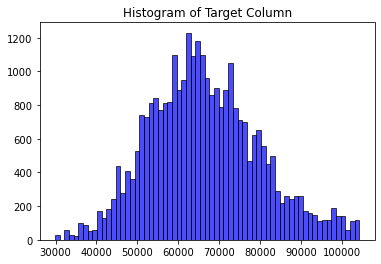

In [131]:
plt.hist(df_clean['median_family_income'], bins='auto', alpha=0.7, color='blue',edgecolor='black')
plt.title('Histogram of Target Column')
plt.show()

<AxesSubplot:xlabel='median_family_income'>

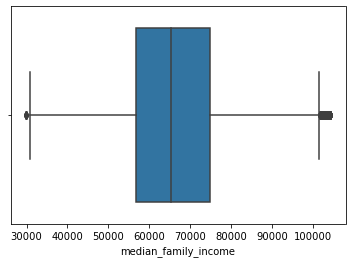

In [132]:
sns.boxplot(x=df_clean["median_family_income"])

## Observation : All my outliers are succesfully removed from dependent column.

In [133]:
df_clean.corr()

,case_id,isMetro,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
case_id,1.000000,-0.002945,-0.009070,-0.011104,0.047803,0.042578,-0.011154,0.040610,-0.061871,0.014492,0.076272
isMetro,-0.002945,1.000000,0.328342,0.030268,-0.104057,-0.068745,0.203716,0.197787,0.283674,0.156280,0.377154
housing_cost,-0.009070,0.328342,1.000000,0.625676,0.303793,0.372651,0.907584,0.672775,0.676349,0.782472,0.443366
food_cost,-0.011104,0.030268,0.625676,1.000000,0.713619,0.824458,0.895387,0.711876,0.473523,0.908825,0.090470
transportation_cost,0.047803,-0.104057,0.303793,0.713619,1.000000,0.698406,0.557508,0.475621,0.348563,0.673658,0.114912
healthcare_cost,0.042578,-0.068745,0.372651,0.824458,0.698406,1.000000,0.656472,0.545278,0.395991,0.794196,-0.054101
other_necessities_cost,-0.011154,0.203716,0.907584,0.895387,0.557508,0.656472,1.000000,0.767193,0.640943,0.935816,0.301777
childcare_cost,0.040610,0.197787,0.672775,0.711876,0.475621,0.545278,0.767193,1.000000,0.624556,0.880129,0.244654
taxes,-0.061871,0.283674,0.676349,0.473523,0.348563,0.395991,0.640943,0.624556,1.000000,0.714893,0.416027
total_cost,0.014492,0.156280,0.782472,0.908825,0.673658,0.794196,0.935816,0.880129,0.714893,1.000000,0.248780


<AxesSubplot:>

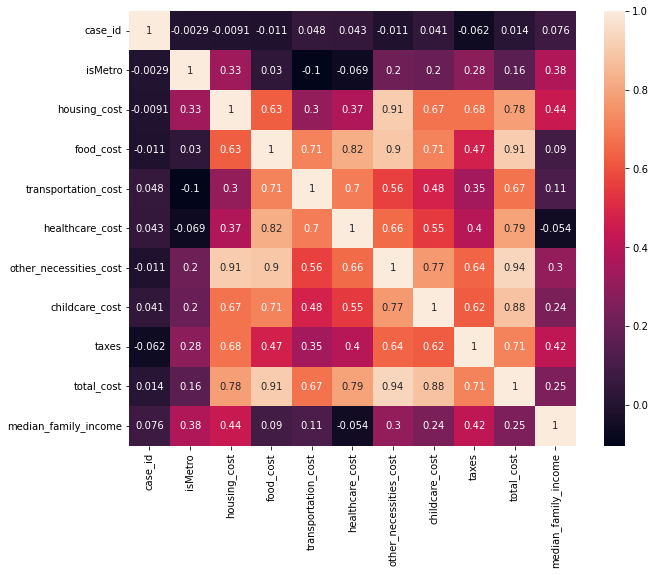

In [134]:
# plotting heatmap to check the correlation
plt.figure(figsize=(10,8))
sns.heatmap(df_clean.corr(),annot=True)

In [135]:
df_clean['county'].value_counts()

Washington County          280
Franklin County            240
Jefferson County           240
Lincoln County             230
Jackson County             230
                          ... 
West Feliciana Parish       10
West Carroll Parish         10
West Baton Rouge Parish     10
Webster Parish              10
Weston County               10
Name: county, Length: 1813, dtype: int64

In [136]:
df_clean['county'].unique()

array(['Autauga County', 'Baldwin County', 'Barbour County', ...,
       'Uinta County', 'Washakie County', 'Weston County'], dtype=object)

In [137]:
# drop the column names like case_id, isMetro, and areaname because they are irrelevant and not usefull.
df_clean.drop(['case_id','isMetro','areaname'],axis=1,inplace=True)
df_clean

,state,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income
0,AL,Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406
1,AL,Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406
2,AL,Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406
3,AL,Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406
4,AL,Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406
...,...,...,...,...,...,...,...,...,...,...,...,...
31425,WY,Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625
31426,WY,Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625
31427,WY,Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625
31428,WY,Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625


In [139]:
df_clean[['Adult','Children']] = df_clean['family_member_count'].str.split('p',n=1, expand=True)

In [140]:
df_clean

,state,county,family_member_count,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,Adult,Children
0,AL,Autauga County,1p0c,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,1,0c
1,AL,Autauga County,1p1c,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,1,1c
2,AL,Autauga County,1p2c,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,1,2c
3,AL,Autauga County,1p3c,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,1,3c
4,AL,Autauga County,1p4c,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,1,4c
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,WY,Weston County,2p0c,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625,2,0c
31426,WY,Weston County,2p1c,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625,2,1c
31427,WY,Weston County,2p2c,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625,2,2c
31428,WY,Weston County,2p3c,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625,2,3c


In [147]:
df_clean['Adult']= df_clean['Adult'].astype(int)

In [144]:
df_clean['Adult'].value_counts()

1    15125
2    15125
Name: Adult, dtype: int64

In [149]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30250 entries, 0 to 31429
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   30250 non-null  object 
 1   county                  30250 non-null  object 
 2   family_member_count     30250 non-null  object 
 3   housing_cost            30250 non-null  float64
 4   food_cost               30250 non-null  float64
 5   transportation_cost     30250 non-null  float64
 6   healthcare_cost         30250 non-null  float64
 7   other_necessities_cost  30250 non-null  float64
 8   childcare_cost          30250 non-null  float64
 9   taxes                   30250 non-null  float64
 10  total_cost              30250 non-null  float64
 11  median_family_income    30250 non-null  float64
 12  Adult                   30250 non-null  int32  
 13  Children                30250 non-null  object 
dtypes: float64(9), int32(1), object(4)
mem

In [151]:
df_clean.drop('family_member_count',axis=1., inplace=True)

In [157]:
df_clean['Children'] = df_clean['Children'].str.replace('c', '')

In [158]:
df_clean

,state,county,housing_cost,food_cost,transportation_cost,healthcare_cost,other_necessities_cost,childcare_cost,taxes,total_cost,median_family_income,Adult,Children
0,AL,Autauga County,8505.72876,3454.91712,10829.16876,5737.47984,4333.81344,0.0000,6392.94504,39254.0532,73010.41406,1,0
1,AL,Autauga County,12067.50240,5091.70788,11588.19288,8659.55640,6217.45896,6147.8298,7422.07836,57194.3256,73010.41406,1,1
2,AL,Autauga County,12067.50240,7460.20308,12361.77720,11581.63260,7075.65816,15824.6940,9769.56228,76141.0308,73010.41406,1,2
3,AL,Autauga County,15257.15040,9952.23924,13452.18600,14503.70760,9134.35620,18802.1892,13101.70320,94203.5328,73010.41406,1,3
4,AL,Autauga County,15257.15040,12182.21400,13744.59840,17425.78560,9942.36396,18802.1892,13469.21880,100823.5200,73010.41406,1,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
31425,WY,Weston County,8316.00000,6010.65672,14790.36240,14466.55920,5191.11288,0.0000,6640.77324,55415.4672,80177.65625,2,0
31426,WY,Weston County,10956.00000,7480.86696,15611.58600,18086.24160,6680.40384,8675.8770,7933.21068,75424.1832,80177.65625,2,1
31427,WY,Weston County,10956.00000,9474.35748,16163.90280,21705.92280,7402.72416,21207.6984,9502.56228,96413.1684,80177.65625,2,2
31428,WY,Weston County,13632.00000,11567.46972,17118.38400,25325.60400,9130.76148,25063.6440,11456.36724,113294.2260,80177.65625,2,3


In [160]:
df_clean['Children']= df_clean['Children'].astype(int)  # As the children coulmn is in object datatype so i converted into int datatype.

In [162]:
df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30250 entries, 0 to 31429
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   30250 non-null  object 
 1   county                  30250 non-null  object 
 2   housing_cost            30250 non-null  float64
 3   food_cost               30250 non-null  float64
 4   transportation_cost     30250 non-null  float64
 5   healthcare_cost         30250 non-null  float64
 6   other_necessities_cost  30250 non-null  float64
 7   childcare_cost          30250 non-null  float64
 8   taxes                   30250 non-null  float64
 9   total_cost              30250 non-null  float64
 10  median_family_income    30250 non-null  float64
 11  Adult                   30250 non-null  int32  
 12  Children                30250 non-null  int32  
dtypes: float64(9), int32(2), object(2)
memory usage: 3.0+ MB


In [163]:
df_clean['state'].unique()

array(['AL', 'AK', 'AZ', 'AR', 'CA', 'CO', 'CT', 'DE', 'FL', 'GA', 'HI',
       'ID', 'IL', 'IN', 'IA', 'KS', 'KY', 'LA', 'ME', 'MD', 'MA', 'MI',
       'MN', 'MS', 'MO', 'MT', 'NE', 'NV', 'NH', 'NJ', 'NM', 'NY', 'NC',
       'ND', 'OH', 'OK', 'OR', 'PA', 'RI', 'SC', 'SD', 'TN', 'TX', 'UT',
       'VT', 'VA', 'WA', 'WV', 'WI', 'WY'], dtype=object)

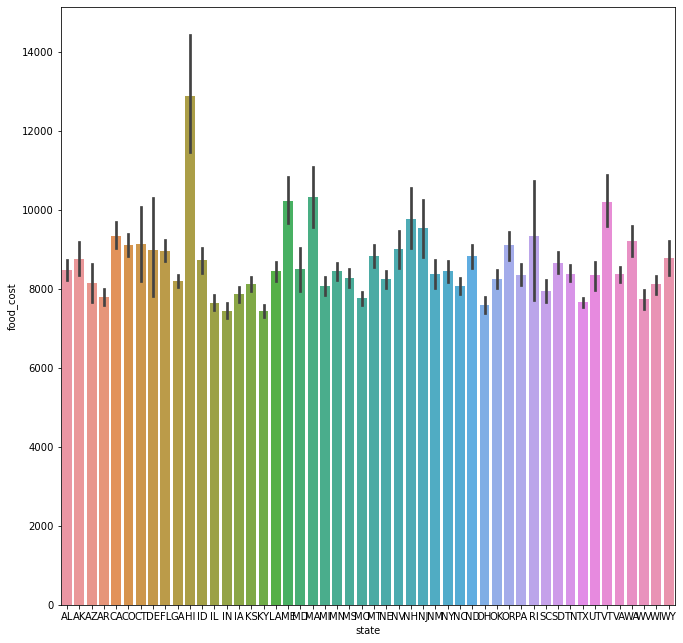

In [175]:
# data visualization.
plt.figure(figsize=(11, 11))
sns.barplot(x='state',y='food_cost', data=df_clean)
plt.xticks(rotation=0)
plt.show()

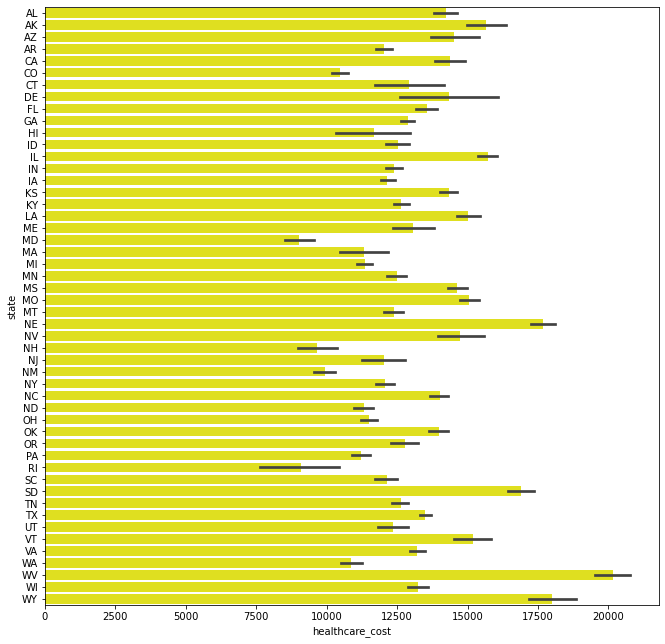

In [185]:
plt.figure(figsize=(11, 11))
sns.barplot(x='healthcare_cost',y='state', data=df_clean, color='yellow')
plt.xticks(rotation=0)
plt.show()

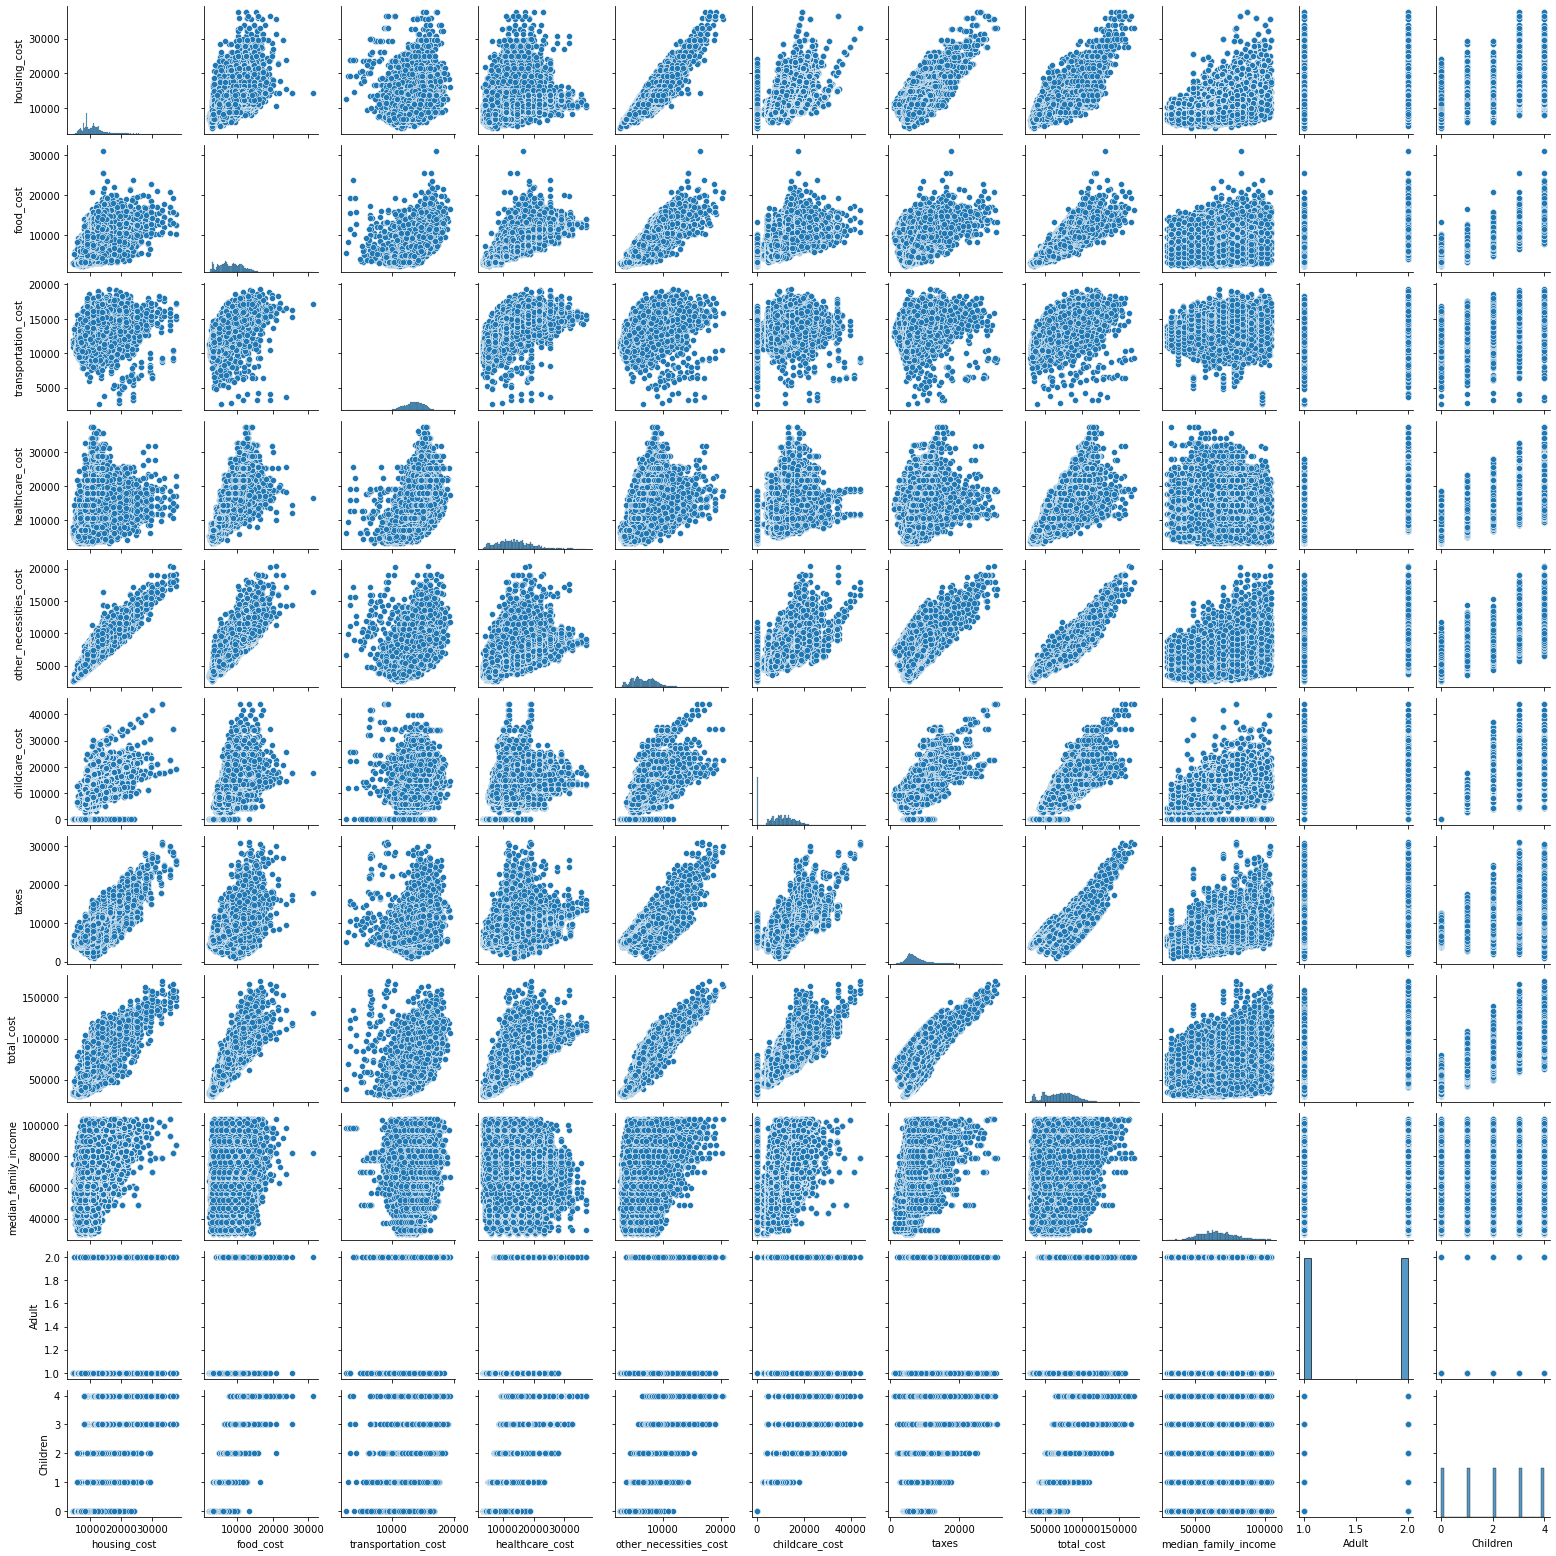

In [184]:
sns.pairplot(df_clean,height=2)

<AxesSubplot:xlabel='state', ylabel='count'>

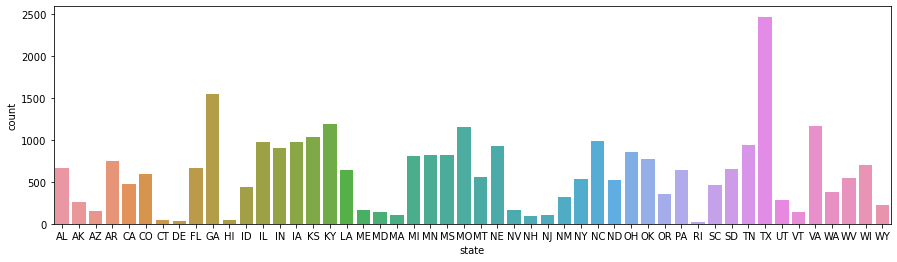

In [191]:
plt.figure(figsize=(15,4))
sns.countplot(x='state', data=df_clean)

<Figure size 1080x288 with 0 Axes>

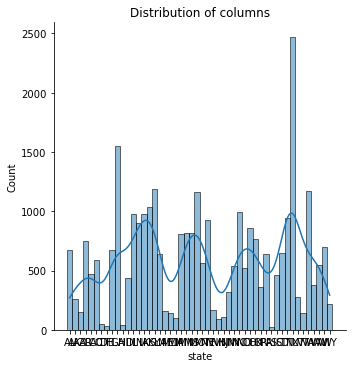

<Figure size 1080x288 with 0 Axes>

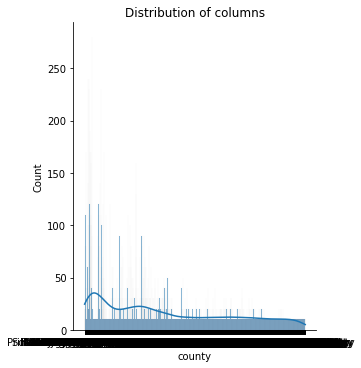

<Figure size 1080x288 with 0 Axes>

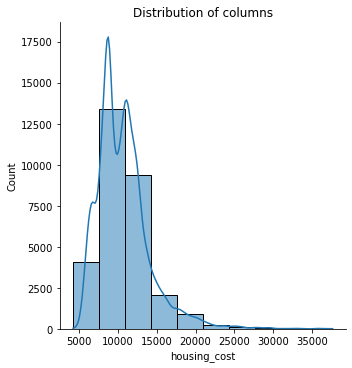

<Figure size 1080x288 with 0 Axes>

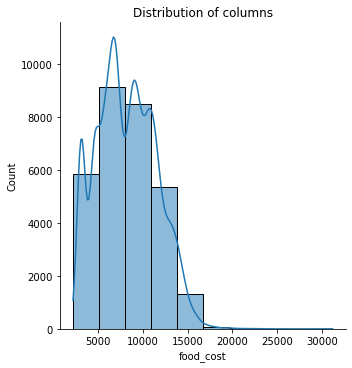

<Figure size 1080x288 with 0 Axes>

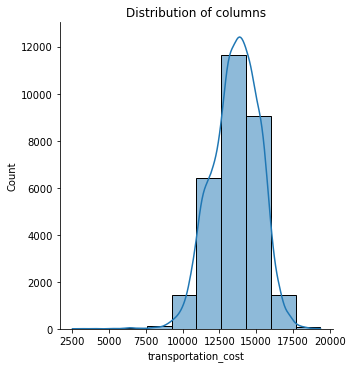

<Figure size 1080x288 with 0 Axes>

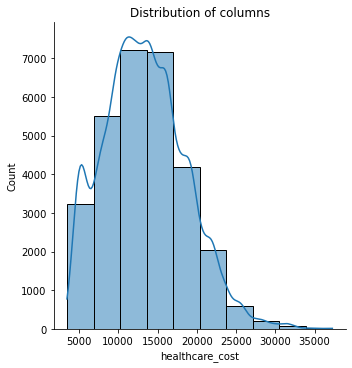

<Figure size 1080x288 with 0 Axes>

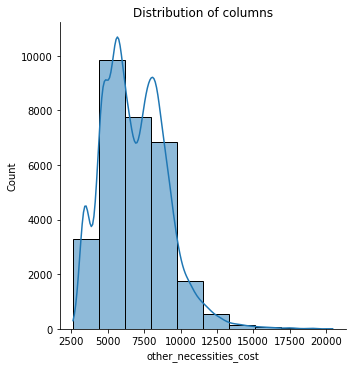

<Figure size 1080x288 with 0 Axes>

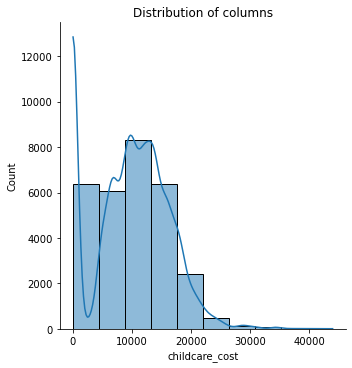

<Figure size 1080x288 with 0 Axes>

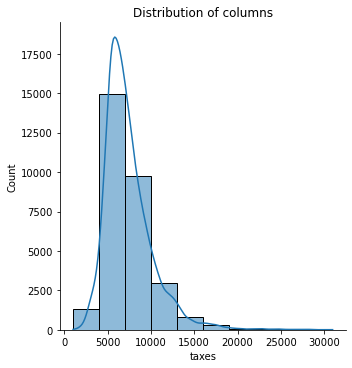

<Figure size 1080x288 with 0 Axes>

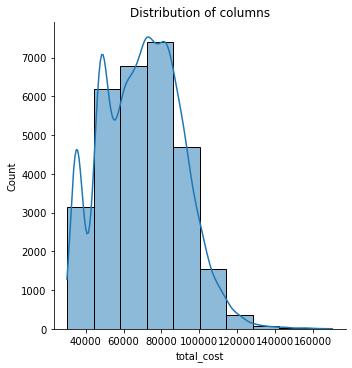

<Figure size 1080x288 with 0 Axes>

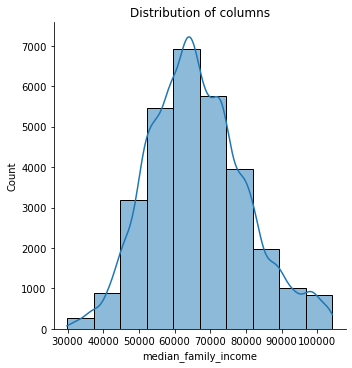

<Figure size 1080x288 with 0 Axes>

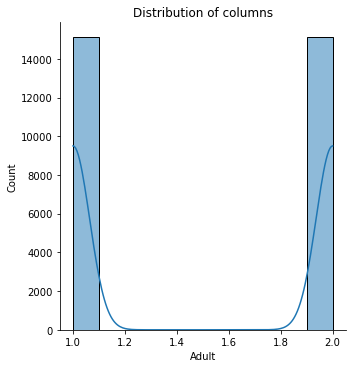

<Figure size 1080x288 with 0 Axes>

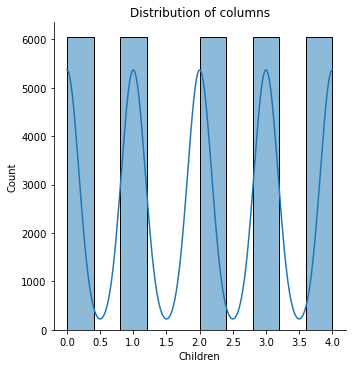

In [196]:
for column in df_clean.columns :
    plt.figure(figsize=(15,4))
    sns.displot(df_clean[column], kde=True, bins=10)
    plt.title('Distribution of columns')
    plt.show()    